<a href="https://colab.research.google.com/github/wikeyen/ox_ml_for_biz/blob/master/Copy_of_Session_1_Predicting_Wine_Quality_with_Linear_Regression_HT25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Wine Quality with Linear Regression


## The Bordeaux Equation

This example is motivated by the study of Princeton professor Orley Ashenfelter (Ashenfelter, Ashmore, and Lalonde 1995) on the quality of red Bordeaux vintages.

Red Bordeaux wines have been produced in Bordeaux, one of most famous and prolific wine regions in the world, in a very similar way for hundreds of years. However, the quality of vintages is largely variable from one season to another due to a long list of random factors, such as the weather conditions.

Because Bordeaux wines taste better when they are older (young wines are astringent, when the wines age they lose their astringency), there is an incentive to store the young wines until they are mature. Due to the important difference in taste, it is hard to determine the quality of the wine when it is so young just by tasting it, because it is going to change substantially when the aged wine is in the market. Therefore, being able to predict the quality of a vintage is a valuable information for investing resources, for determining a fair price for vintages and for understanding what factors are affecting the wine quality.

In this first notebook, we will apply linear regression using Python.

## The goals of this analysis
*   Can we predict the quality of a vintage effectively?
*   What is the interpretation of such prediction?

## Data Description

This dataset contains the following columns:

*  **Year**: year in which grapes were harvested to make wine.

*  **Price**: the average market price for Bordeaux vintages according to 1990–1991 auctions..

*  **WinterRain**: winter rainfall (in mm).

*  **AGST**: Average Growing Season Temperature (in Celsius degrees).

*  **HarvestRain**: harvest rainfall (in mm).

*  **Age**: age of the wine measured as the number of years stored in a cask.

The quality of the wine is quantified as the Price, a clever way of quantifying a qualitative measure.

# Setup

## Import libraries

Import the following libraries. They are the pillars for our excercise.
- <b>Pandas</b> and <b>Numpy</b> for managing common data structures
- <b>seaborn</b> and <b>matplotlib</b> for creating figures



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
%matplotlib inline
# The previous line help is to display the plots inline within Jupyter

sns.set()

## Import the dataset

*Lets* read the data set

In [ ]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT3zLaz0NNWwYcsF6VopsC22qfSv-6zQl_GmPDrjrF_3xkEX6Km-cpEpdb1vdVRiEeXspQ0qtR0mZd8/pub?gid=1055086703&single=true&output=csv")

One way to quickly visualise the data set is using the `head()` and `tail()` methods.
**Print the first 6 rows and the last 5 rows**.
Let's ask ChatGPT how to do it!

# Data exploration

Before we apply any machine learning, it is key to understand what is in the data. Remember Garbage in, Garbage out. So let's take a closer look at the data

### Numerical Eploration

How many columns and rows are in this dataset?

In [ ]:
data.shape

(25, 6)

We also want to check some descriptive statistics. For example, what is the mean, max and min value of each column. By checking these values we can intuitively check if the data make sense. To become more familiar wiht learning from LLMs, try to ask this question and compare it with the response we have below.

In [ ]:
data.describe()

,Year,Price,WinterRain,AGST,HarvestRain,Age
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000


Sometimes it may be useful to get a quick summary of the data. Use the `info` method for this. What is Dtype? *If you are unsure, you can again ask your favorite GenAI tool.*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         25 non-null     int64  
 1   Price        25 non-null     float64
 2   WinterRain   25 non-null     int64  
 3   AGST         25 non-null     float64
 4   HarvestRain  25 non-null     int64  
 5   Age          25 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


### Graphical Exploration

Graphical explorations are also a great way to see what is in the data and check for incosistencies and data problems.

Build a correlation matrix.


In [ ]:
corr = data.corr()

In [ ]:
corr

,Year,Price,WinterRain,AGST,HarvestRain,Age
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000


Lets see this correlation in a graphical way. Use a heatmap to plot your correlation

<Axes: >

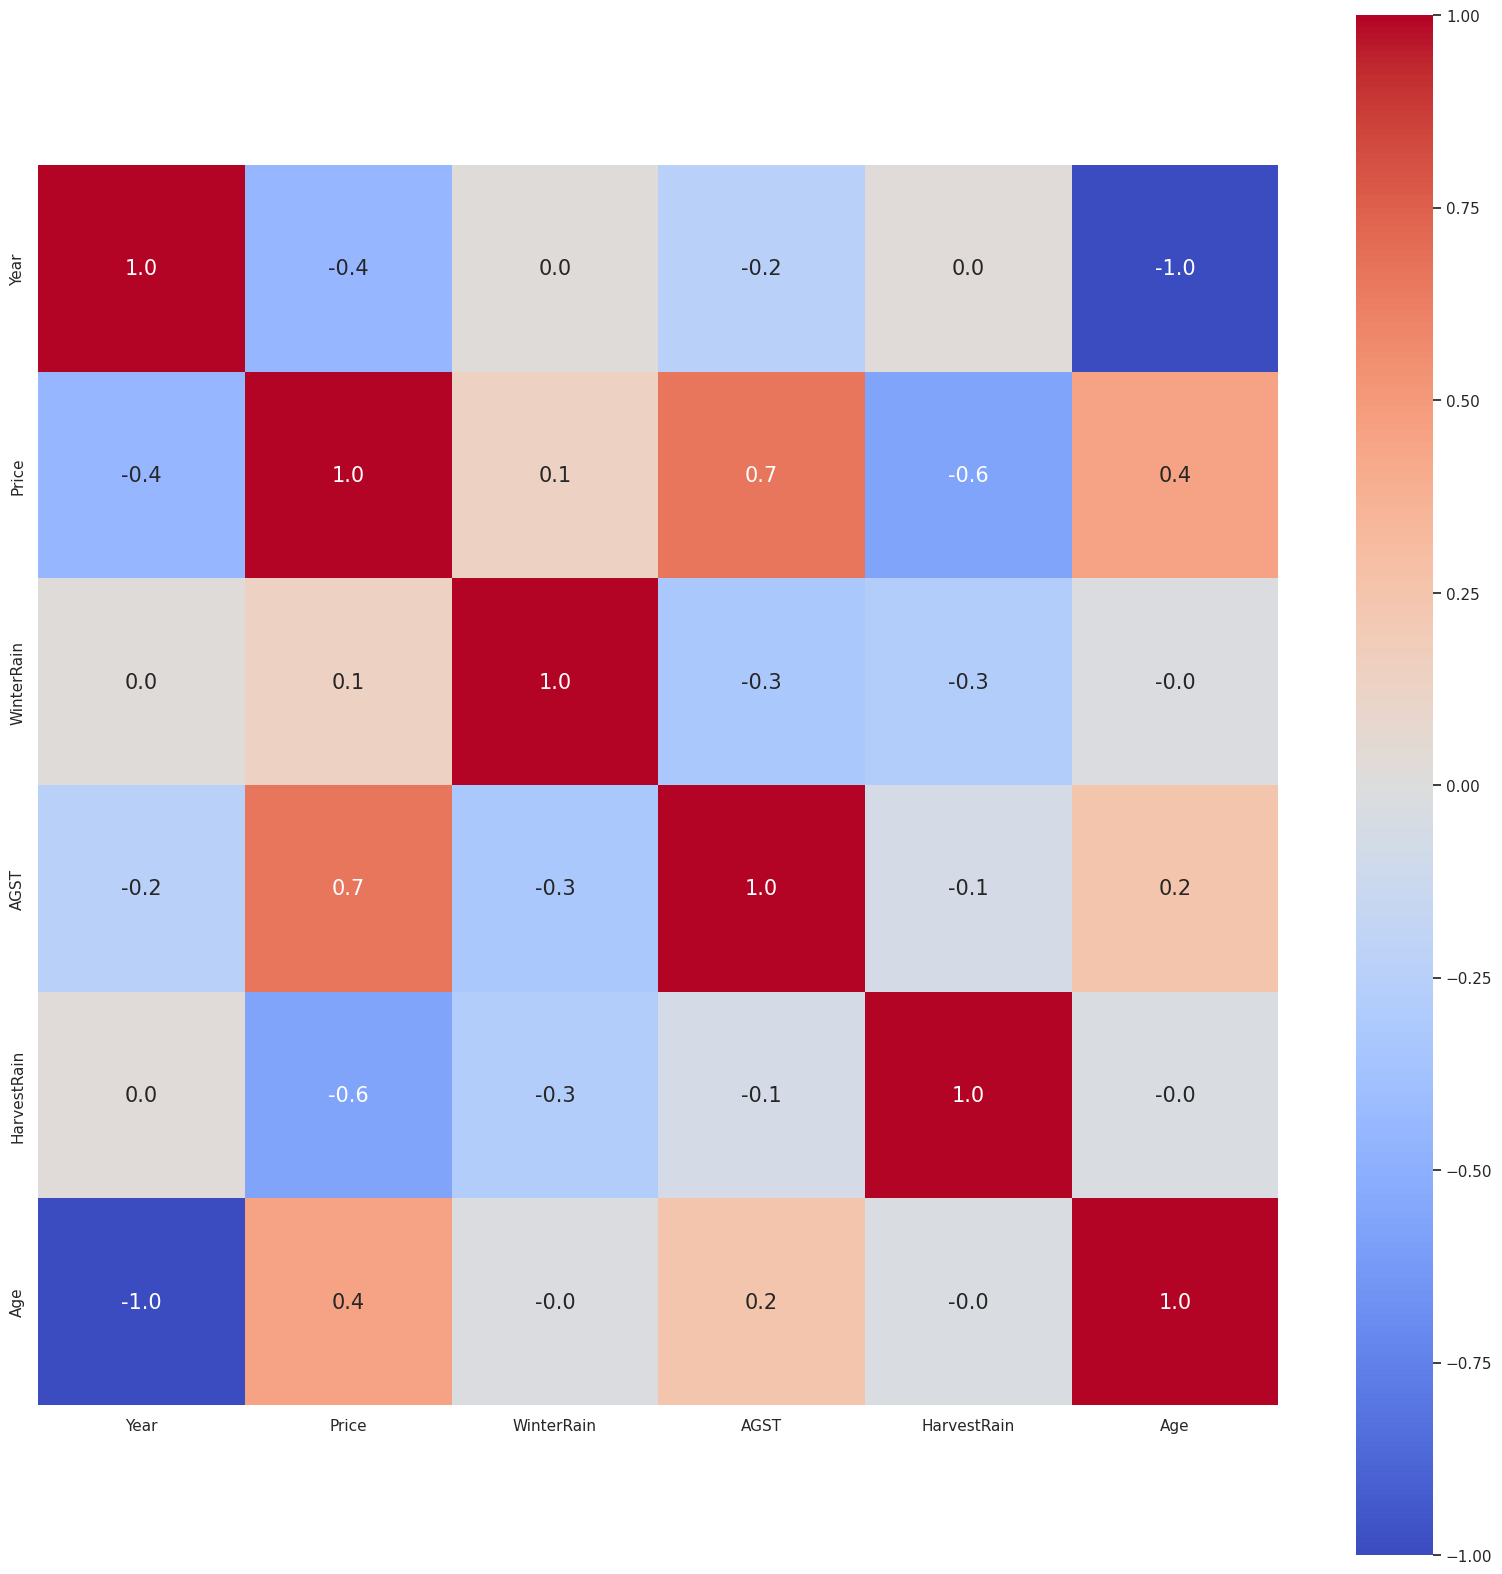

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap = 'coolwarm')

Visual inspection is also great for exploring each individual variable, or the link between two variables.

How are the wine prices distributed?

***Hint***: *Plot a histogram*

<Axes: xlabel='Price', ylabel='Count'>

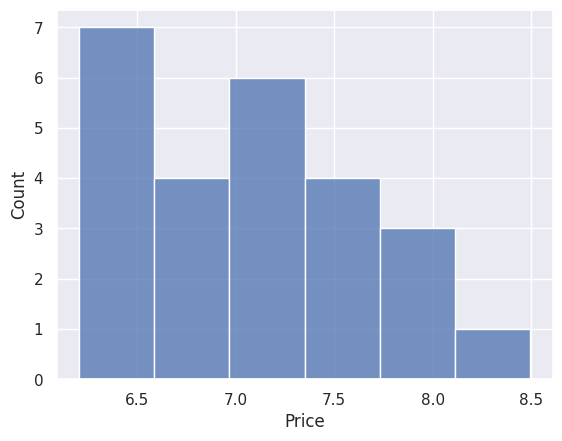

In [ ]:
sns.histplot(data = data, x = 'Price')

As mentioned before, you can use figures also to explore the link between two variables. Use a scatter plot to visually inspect if there is any link between the amount of rain during the harvest season and the wine prices.

<Axes: xlabel='WinterRain', ylabel='Price'>

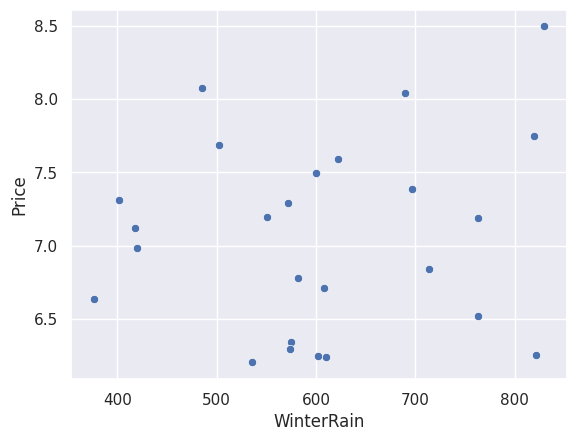

In [ ]:
sns.scatterplot(data = data, x='WinterRain',  y = 'Price')

What about the link between age and price? Is this what you expected?

<Axes: xlabel='Age', ylabel='Price'>

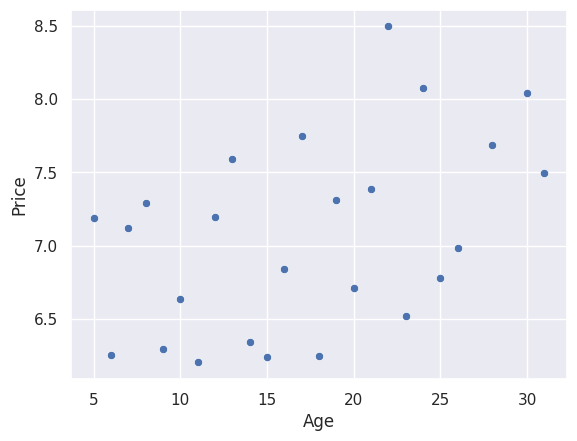

In [ ]:
sns.scatterplot(data = data, x='Age',  y = 'Price')

## Outliers

Sometimes our dataset includes observations that are extraordinary high or low. Before incorporating them into our model, we have to get a good sense of any potential outliers.A

**Question:** *In one year, there was only 376 mm of winter rain - which year was that?*

To ask for AI's help, try to ask the following: how can I get the row of a dataset with the minimum value in one column.

In [ ]:
min_value_index = data['WinterRain'].idxmin()
print(data.loc[min_value_index])

Year           1973.0000
Price             6.6367
WinterRain      376.0000
AGST             17.0667
HarvestRain     123.0000
Age              10.0000
Name: 19, dtype: float64


**Question:** *In another year there was 830 mm of winter rain - which year was that one?*

Try to think on your own, what would you change here?
Check with GenAI your answer.

Let's sort the data in an ascending order based on the amount of Winter Rain.


In [ ]:
data.sort_values(by=['WinterRain'])

,Year,Price,WinterRain,AGST,HarvestRain,Age
19,1973,6.6367,376,17.0667,123,10
10,1964,7.3094,402,17.2667,96,19
22,1976,7.1211,418,17.6500,247,7
3,1957,6.9845,420,16.1333,110,26
5,1959,8.0757,485,17.4833,187,24
2,1955,7.6858,502,17.1500,130,28
18,1972,6.2049,536,14.9833,158,11
17,1971,7.1934,551,16.7667,112,12
21,1975,7.2920,572,16.9500,171,8
20,1974,6.2941,574,16.3000,184,9


Let's go back to the graphical exploration and ispect the relationship between AGST and Price.

<Axes: xlabel='AGST', ylabel='Price'>

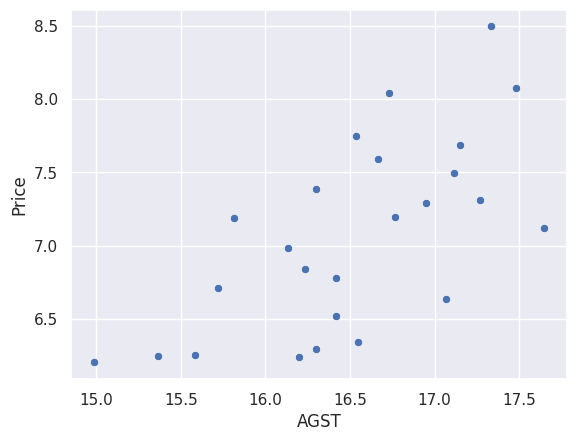

In [ ]:
sns.scatterplot(data = data, x='AGST',  y = 'Price')

It looks like high AGST leads to higher price.That is not always the case though...Let's look at the cases where the AGST is higher than average, but the price is lower than average.

Note: in Python, the symbol for the logic "AND" is "&" and for the logic "OR" is "|".

First we need to find the average for AGST and Price.

In [ ]:
print("The mean for AGST is", np.mean(data['AGST']))
print("The mean for Price is", np.mean(data['Price']))

The mean for AGST is 16.509336
The mean for Price is 7.0672239999999995


In [ ]:
outliers = data[(data['AGST']>=16.51) & (data['Price']<=7.067)]
outliers

,Year,Price,WinterRain,AGST,HarvestRain,Age
15,1969,6.3459,575,16.5500,244,14
19,1973,6.6367,376,17.0667,123,10


# Train a Linear Regression Model

### Separate the target from the predictors

We first separate the target from the independent variables. In this case, the target is the wine price (`data['Price']`).

We will also drop the column of Year (`data['Year']`) as it does not add any actionable information to the dataset.

In [ ]:
X_train = data.drop(['Price', 'Year'], axis = 1)
y_train = data['Price']

### Make a linear regressor

Import the `LinearRegression` module from sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

Create an instance of the linearRegression

In [ ]:
lm = LinearRegression()

Train the regressor

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

All done! You have trained a linear regressor succesfully! It wasn't that difficult, was it?

*Ask GenAI to provide you with code on splitting a dataset and training a linear regression model. Can you improve our notebook? Compare the resulting performance at the end.*

Let's see what we have done. Print the intercept and coefficients of your new model

In [ ]:
print(lm.intercept_)

-3.429980186928713


*What is the interpretation of the intercept?*

In [ ]:
print(lm.coef_)

[ 0.00107551  0.60720935 -0.00397153  0.02393083]


Let's print it in a more interpretable way

In [ ]:
coefficients = pd.DataFrame([X_train.columns, lm.coef_])

In [ ]:
coefficients

,0,1,2,3
0,WinterRain,AGST,HarvestRain,Age
1,0.001076,0.607209,-0.003972,0.023931


*What is the interpretation of the coefficients?*

Well done! You have succesfully trained a linear model to predict wine prices.

# Make predictions

Now that we have trained our algorithm, it's time to make some predictions. To do so, we will use both the train and test data and see how accurately our algorithm predicts the wine prices.

### Predictions on the training set

We will first make predictions using our training data set

In [ ]:
y_pred = lm.predict(X_train)

#### $R^2 $ - Coefficient of Determination

It's time to evaluate the model. Let's first calculate the coefficient of determination.

It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.

***Hint***: *use the `metrics` module*

In [ ]:
r_squared = metrics.r2_score(y_train, y_pred)
print ('R^2:', r_squared)

R^2: 0.8285662193424284


#### Mean Absolute Error (MAE)

This metric quantifies the average difference between the predicted value (price) and the observed value. This measure does not depend on whether we are over- or under-predicting the final price. It focuses only on the average difference.

In [ ]:
MAE = metrics.mean_absolute_error(y_train, y_pred)
print("On average the predicted price differs from the actual wine price by", MAE)

On average the predicted price differs from the actual wine price by 0.22593744084778294


#### Other metrics

You can calculate other error metrics, such as the Mean Squared Error and the Root Mean Squared Error.

*Ask GenAI for a definition of these metrics.*

In [ ]:
MSE = metrics.mean_squared_error(y_train, y_pred)
RMSE = np.sqrt(MSE)

In [ ]:
print('MAE: {} \n MSE: {}\n RMSE: {}'.format(MAE, MSE, RMSE))

MAE: 0.22593744084778294 
 MSE: 0.06960648805539932
 RMSE: 0.2638304153341675


Let's see how the model performs on the **training** set.

Text(0.5, 1.0, 'Actual vs predicted prices')

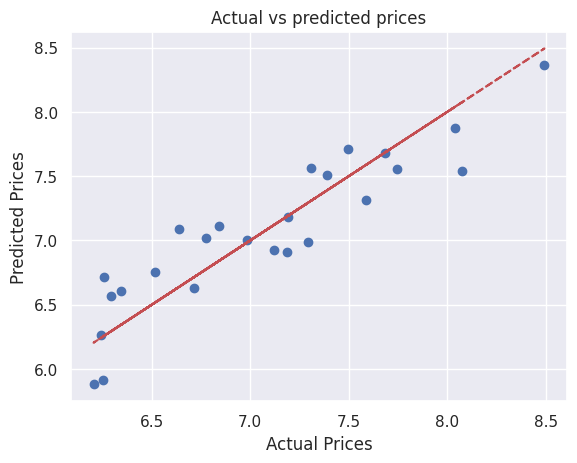

In [ ]:
plt.scatter(y_train, y_pred )
plt.plot(y_train, y_train, '--', color = 'r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs predicted prices')

## Predictions on the testing set

Ideally, we would create this model to apply it in future observations whose final outcome is neither known nor previously seen by the model. This is the notion of the **testing set**.

Let's load a new dataset that contains observations from the subsequent years.

In [ ]:
data_test = pd.read_csv("https://users.ox.ac.uk/~mast7218/ml4business/wineTest.csv")

In [ ]:
data_test.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age
0,1979,6.9541,717,16.1667,122,4
1,1980,6.4979,578,16.0000,74,3


In [ ]:
X_test = data_test.drop(['Price', 'Year'], axis = 1)
y_test = data_test['Price']

Its time to see if our model is able to generalise over unseen data. For that we use the `predict` methods

In [ ]:
y_test_pred = lm.predict(X_test)

Calculate the R2, R2 adjusted, MAE, MSE and RMSE.

In [ ]:
r_squared_lm = metrics.r2_score(y_test, y_test_pred)
MAE_lm = metrics.mean_absolute_error(y_test, y_test_pred)
MSE_lm = metrics.mean_squared_error(y_test, y_test_pred)
RMSE_lm = np.sqrt(MSE_lm)

Print the R2, MAE, MSE and RMSE.

In [ ]:
print('R2:', r_squared_lm,
      'MAE:', MAE_lm,
      'MSE', MSE_lm,
      'RMSE', RMSE_lm)

R2: 0.3343904702752377 MAE: 0.18609288650539568 MSE 0.034631404243862914 RMSE 0.18609514836196808


Let's see how the model performs on the **testing** set.

Text(0.5, 1.0, 'Actual vs predicted prices')

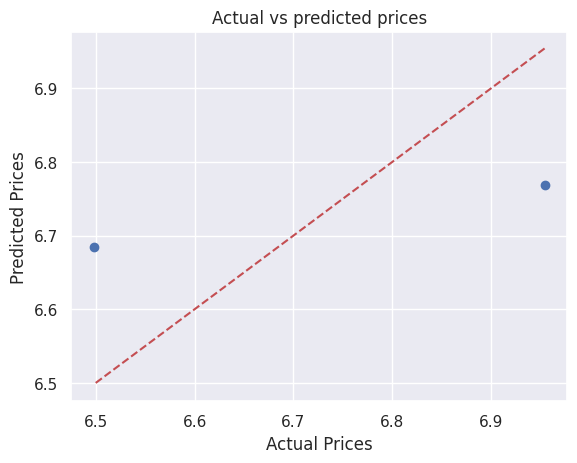

In [ ]:
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, '--', color = 'r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs predicted prices')

# Regularized Regression

You can use the same process as above to train regularized models. There are two main types of regularizations:


*   Lasso: Minimize the sum of the absolute values of the β coefficients. Leads to sparse solutions with more coefficients equal to zero.


```
from sklearn.linear_model import Lasso
lm_lasso = Lasso(alpha=X)
```
*   Ridge: Minimize the sum of the squared values of the β coefficients. Leads to well balanced coefficients with small values.

```
from sklearn.linear_model import Ridge
lm_ridge = Ridge(alpha=X)
```

**Build two new linear regression models, one with Lasso and one with Ridge regularization. You can adapt the code from above and/or use GenAI. Is the performance of the resulting model improved on the testing set?**

## Optional Readings for Lasso and Ridge Regression

For those of you that would like to get a better understanding of Lasso and Ridge Regression, here are some additional advanced readings:
*   https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/
*   https://towardsdatascience.com/an-introduction-lasso-and-ridge-regression-using-scitkit-learn-d3427700679c



## Lasso Model

We will train and test a Lasso model for a given α parameter. You can change the value of α to understand its impact on the resulting **β** coefficients and the model performance.

Set a value for α. It needs to be between 0 and 1.

In [ ]:
alpha_value=0.5

Load the relavant packages and train the model. Note that I am just going to repeat the same commands as above, when I was training the `lm` model [`lm=LinearRegression()`]. I have adapted the code to use the Lasso algorithm.

In [ ]:
from sklearn.linear_model import Lasso
lm_lasso = Lasso(alpha=alpha_value)
lm_lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

### Exercise 1:
Get the model's predictions on the training and testing sets.



In [ ]:
y_pred_lasso = lm_lasso.predict(X_train)
y_test_pred_lasso = lm_lasso.predict(X_test)

### Exercise 2:
Evaluate the performance on the training set

In [ ]:
r_squared_lasso_train = metrics.r2_score(y_train, y_pred_lasso)
MAE_lasso_train = metrics.mean_absolute_error(y_train, y_pred_lasso)
MSE_lasso_train = metrics.mean_squared_error(y_train, y_pred_lasso)
RMSE_lasso_train = np.sqrt(MSE_lm)
print('R2:', r_squared_lasso_train,
      'MAE:', MAE_lasso_train,
      'MSE', MSE_lasso_train,
      'RMSE', RMSE_lasso_train)

R2: 0.49321268991374145 MAE: 0.3695488462511558 MSE 0.2057685755446769 RMSE 0.18609514836196808


### Exercise 3:
Evaluate the performance on the testing set

In [ ]:
r_squared_lasso_test = metrics.r2_score(y_test, y_test_pred_lasso)
MAE_lasso_test = metrics.mean_absolute_error(y_test, y_test_pred_lasso)
MSE_lasso_test = metrics.mean_squared_error(y_test, y_test_pred_lasso)
RMSE_lasso_test = np.sqrt(MSE_lm)
print('R2:', r_squared_lasso_test,
      'MAE:', MAE_lasso_test,
      'MSE', MSE_lasso_test,
      'RMSE', RMSE_lasso_test)

R2: -1.852391085150776 MAE: 0.3287731297051293 MSE 0.14840879572787222 RMSE 0.18609514836196808


## Ridge Model

We will train and test a Ridge model for the given α parameter from above. You can still change the value of α to understand the impact of Ridge regularization on the resulting **β** coefficients and the model performance.

### Exercise 4:
Try to browse online or ask ChatGPT how to train the Ridge rergression model.

In [ ]:
from sklearn.linear_model import Ridge
lm_ridge = Ridge(alpha=alpha_value)
lm_ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

### Exercise 5:

Get the model's predictions on the training and testing sets.

In [ ]:
y_pred_ridge = lm_ridge.predict(X_train)
y_test_pred_ridge = lm_ridge.predict(X_test)


### Exercise 6:
Calculate the performance on the training set.

In [ ]:
r_squared_ridge_train = metrics.r2_score(y_train, y_pred_ridge)
MAE_ridge_train = metrics.mean_absolute_error(y_train, y_pred_ridge)
MSE_ridge_train = metrics.mean_squared_error(y_train, y_pred_ridge)
RMSE_ridge_train = np.sqrt(MSE_lm)
print('R2:', r_squared_ridge_train,
      'MAE:', MAE_ridge_train,
      'MSE', MSE_ridge_train,
      'RMSE', RMSE_ridge_train)

R2: 0.8276559456217175 MAE: 0.22777530496620238 MSE 0.06997608240620208 RMSE 0.18609514836196808


### Exercise 7:
Evaluate the performance on the testing set.

In [ ]:
r_squared_ridge_test = metrics.r2_score(y_test, y_test_pred_ridge)
MAE_ridge_test = metrics.mean_absolute_error(y_test, y_test_pred_ridge)
MSE_ridge_test = metrics.mean_squared_error(y_test, y_test_pred_ridge)
RMSE_ridge_test = np.sqrt(MSE_lm)
print('R2:', r_squared_ridge_test,
      'MAE:', MAE_ridge_test,
      'MSE', MSE_ridge_test,
      'RMSE', RMSE_ridge_test)

R2: 0.2786167539851042 MAE: 0.1936594943533958 MSE 0.03753328895068922 RMSE 0.18609514836196808


## Final Question: Performance Comparison

Which model performs best? What is the best value of α? Why is that the case?
Try to think about what we discussed in the class.
